<a href="https://colab.research.google.com/github/HepiBGediya/StartUpFunding_analysis_prediction/blob/main/StartUpFunding_analysis_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***IMPORT LIBRARY***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

***DATA COLLECTION***

In [2]:
sf=pd.read_csv("startup_funding.csv")

In [3]:
sf.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


***DATA PREPROCESSING***

Checking the Data

In [4]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [5]:
sf.describe()

,Sr No
count,3044.000000
mean,1522.500000
std,878.871435
min,1.000000
25%,761.750000
50%,1522.500000
75%,2283.250000
max,3044.000000


In [6]:
sf.nunique()

,0
Sr No,3044
Date dd/mm/yyyy,1035
Startup Name,2459
Industry Vertical,821
SubVertical,1942
City Location,112
Investors Name,2412
InvestmentnType,55
Amount in USD,471
Remarks,72


***CHECKING FOR MISSING VALUE***

In [7]:
sf.isnull().sum()

,0
Sr No,0
Date dd/mm/yyyy,0
Startup Name,0
Industry Vertical,171
SubVertical,936
City Location,180
Investors Name,24
InvestmentnType,4
Amount in USD,960
Remarks,2625


***DELETE UNWANTED COLUMNS***

In [8]:
sf.drop('Remarks', axis=1, inplace=True)

Replacing the commas in 'Amount in USD' feature

In [9]:
sf['Amount in USD'] = sf['Amount in USD'].apply(lambda x: str(x).replace(',', ''))

Fixing the faulty values in 'Amount in USD' feature

In [10]:
sf['Amount in USD'] = sf['Amount in USD'].apply(lambda x : str(x).replace("undisclosed", "0"))
sf['Amount in USD'] = sf['Amount in USD'].apply(lambda x : str(x).replace("Undisclosed", "0"))
sf['Amount in USD'] = sf['Amount in USD'].apply(lambda x : str(x).replace("unknown", "0"))
sf['Amount in USD'] = sf['Amount in USD'].apply(lambda x : str(x).replace("14342000+", "0"))
sf['Amount in USD'] = sf['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa010000000", "0"))
sf['Amount in USD'] = sf['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa05000000", "0"))
sf['Amount in USD'] = sf['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa019350000", "0"))
sf['Amount in USD'] = sf['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa0600000", "0"))
sf['Amount in USD'] = sf['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa020000000", "0"))
sf['Amount in USD'] = sf['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa0N/A", "0"))
sf['Amount in USD'] = sf['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa016200000", "0"))
sf['Amount in USD'] = sf['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa0685000", "0"))
sf['Amount in USD'] = sf['Amount in USD'].apply(lambda x : str(x).replace("nan", "0"))

**Converting to numeric data-type**

In [11]:
sf['Amount in USD'] = pd.to_numeric(sf['Amount in USD'])

Converting Amount in USD from string to integer

In [12]:
# Check if the column contains string values
if sf['Amount in USD'].dtype == 'object':
    # Replace commas, "undisclosed", and "unknown" values
    sf["Amount in USD"] = sf["Amount in USD"].str.replace(",", "")
    sf["Amount in USD"] = sf["Amount in USD"].str.replace("undisclosed", "")
    sf["Amount in USD"] = sf["Amount in USD"].str.replace("unknown", "")
    sf["Amount in USD"] = sf["Amount in USD"].str.replace("Undisclosed", "")
else:
    print("Column 'Amount in USD' does not contain string values.")

# Now you can proceed with your prediction code

Column 'Amount in USD' does not contain string values.


In [13]:
sf.describe()

,Sr No,Amount in USD
count,3044.000000,3.044000e+03
mean,1522.500000,1.250254e+07
std,878.871435,1.003304e+08
min,1.000000,0.000000e+00
25%,761.750000,0.000000e+00
50%,1522.500000,5.000000e+05
75%,2283.250000,4.000000e+06
max,3044.000000,3.900000e+09


**Checking dataset after cleaning it**

In [14]:
sf.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


***STARTUPS ANALYSIS***

**Number of unique Startups**

In [15]:
print(f"The numebr of Unique Startups are\t {sf['Startup Name'].nunique()} ")

The numebr of Unique Startups are	 2459 


**Top 10 Startups which are attrative means they have maximum number of Investors**

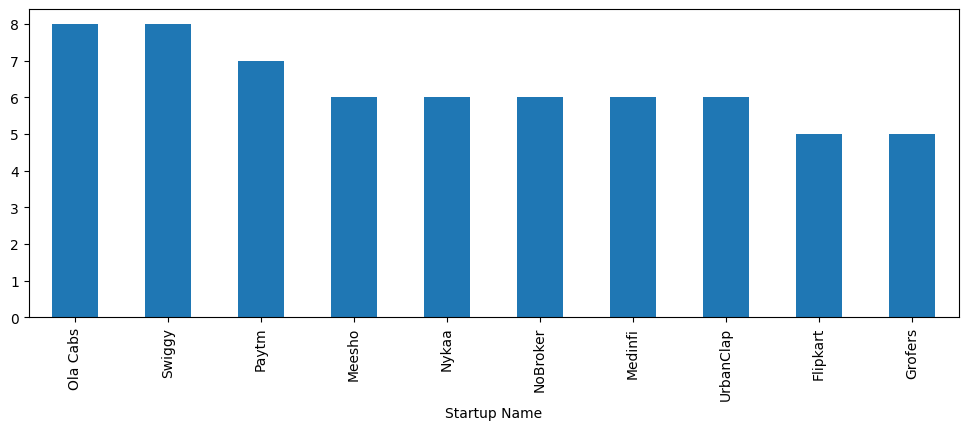

In [16]:
sf['Startup Name'].value_counts()[:10].plot(kind='bar', figsize=(12,4))
plt.show()

**Top 10 Startups with maximum funding**

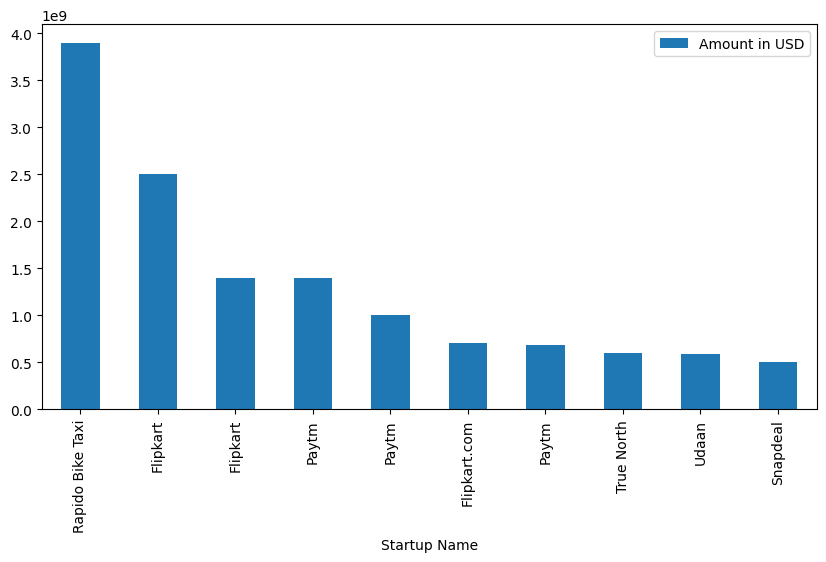

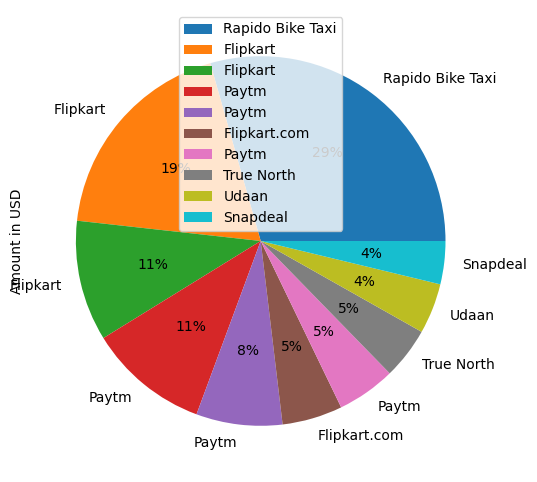

Startup Name,Rapido Bike Taxi,Flipkart,Flipkart,Paytm,Paytm,Flipkart.com,Paytm,True North,Udaan,Snapdeal
Amount in USD,3.900000e+09,2.500000e+09,1.400000e+09,1.400000e+09,1.000000e+09,700000000.0,680000000.0,600000000.0,585000000.0,500000000.0


In [17]:
temp_df = sf.sort_values('Amount in USD', ascending=False, )
temp_df = temp_df[['Startup Name', 'Amount in USD']][:10].set_index('Startup Name', drop=True, )
temp_df.plot(kind='bar', figsize=(10,5))
plt.show()

temp_df.plot(kind='pie', subplots=True, figsize=(12,6), autopct='%.f%%')
plt.show()
temp_df.T

***INVESTORS AND INDUSTRIES A***

**Number of Unique Investors**

In [18]:
print(f"The number of unique investors in Indian ecosystem between 2015 to 2017 are\t {sf['Investors Name'].nunique()}")

The number of unique investors in Indian ecosystem between 2015 to 2017 are	 2412


**Top 10 Investors in Indian ecosystem according to the total amount they invested in startups**

In [19]:
investor = sf.groupby('Investors Name')['Amount in USD'].sum().reset_index()
investor.sort_values('Amount in USD', inplace=True, ascending=False)
investor.reset_index()[:10]

,index,Investors Name,Amount in USD
0,2321,Westbridge Capital,3.900000e+09
1,1949,Softbank,2.500000e+09
2,1940,SoftBank Group,1.462000e+09
3,1292,"Microsoft, eBay, Tencent Holdings",1.400000e+09
4,2271,Vijay Shekhar Sharma,1.000150e+09
5,1989,Steadview Capital and existing investors,7.000000e+08
6,132,"Alibaba Group, Ant Financial",6.800000e+08
7,148,"Altimeter Capital, DST Global",5.850000e+08
8,1945,SoftBank Vision Fund,5.310000e+08
9,134,"Alibaba, Foxconn, Softbank",5.000000e+08


**Top 10 industries which are favourite of Investors**

In [20]:
sf['Industry Vertical'].value_counts()[:10].reset_index()

,Industry Vertical,count
0,Consumer Internet,941
1,Technology,478
2,eCommerce,186
3,Healthcare,70
4,Finance,62
5,ECommerce,61
6,Logistics,32
7,E-Commerce,29
8,Education,24
9,Food & Beverage,23


***CITIES ANALYSIS***

**Top 10 cities which have maximum startups**

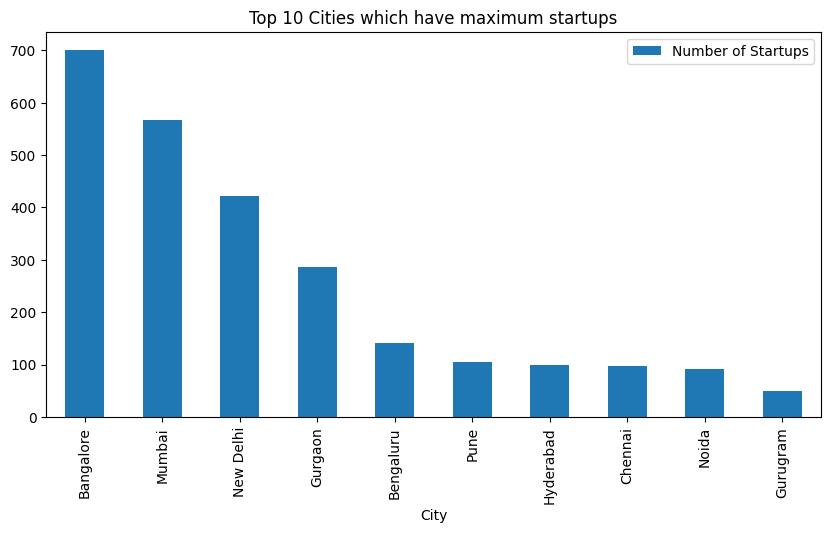

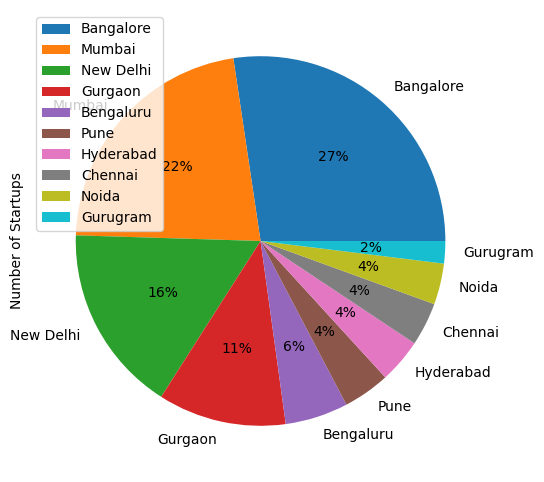

City,Bangalore,Mumbai,New Delhi,Gurgaon,Bengaluru,Pune,Hyderabad,Chennai,Noida,Gurugram
Number of Startups,700,567,421,287,141,105,99,97,92,50


In [21]:
city = sf['City  Location'].value_counts()[:10].reset_index()
city.columns = ['City', 'Number of Startups']
city.set_index('City', drop=True, inplace=True)
city.plot(kind='bar', figsize=(10,5), title='Top 10 Cities which have maximum startups')
plt.show()

city.plot(kind='pie', subplots=True, figsize=(12,6), autopct='%.f%%')
plt.show()
city.T

***FUND ANALYSIS***

**Different type of funding (Investment type)**

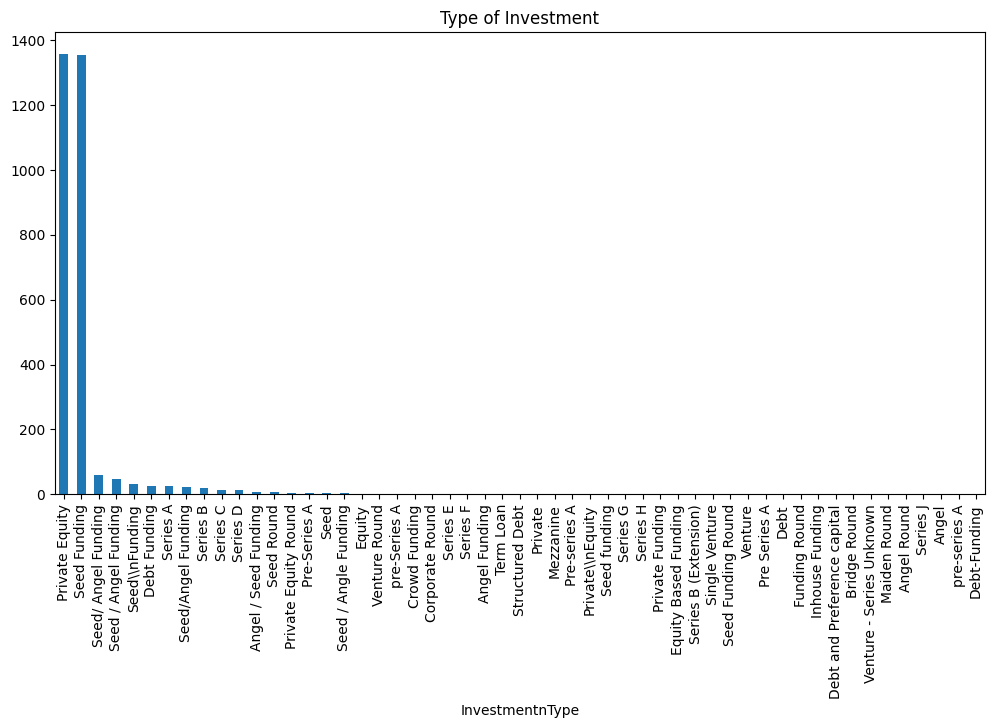

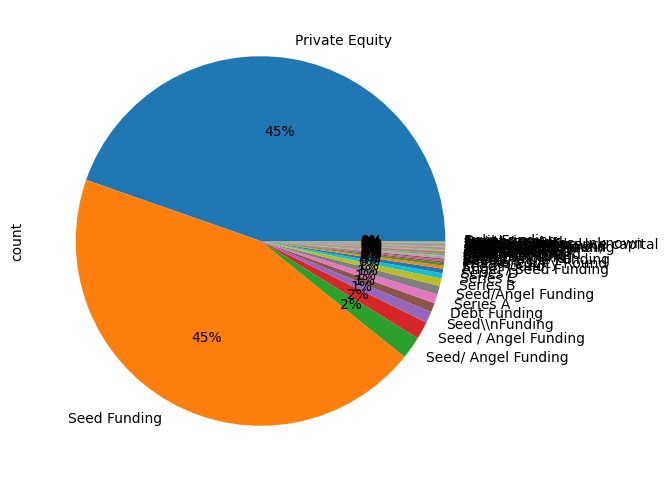

In [22]:
def convert(x):
    if x== 'SeedFunding':
        return 'Seed Funding'
    elif x== 'PrivateEquity':
        return 'Private Equity'
    elif x== 'Crowd funding':
        return 'Crowd Funding'
    else:
        return x

sf['InvestmentnType'] = sf['InvestmentnType'].apply(convert)

sf['InvestmentnType'].value_counts().plot(kind='bar', figsize=(12,6), title='Type of Investment')
plt.show()

sf['InvestmentnType'].value_counts().plot(kind='pie', figsize=(12,6), subplots=True, autopct='%.f%%')
plt.show()

***Training and predicting***

Linear Regression model to train on the data and use it for future predictions.

In [23]:
# Selecting relevant columns for prediction
X = sf[['Industry Vertical','City  Location', 'Investors Name','Amount in USD']]
y = sf['Amount in USD']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Initialize linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.5763919443535606e-08
R-squared: 1.0




*   The Mean Squared Error (MSE) value of 1.576×10−8
  indicates that the average squared difference between predicted and actual values is extremely small. This suggests that the model's predictions are very close to the actual values, implying high accuracy.

*   The R2 value of 1.0 indicates a perfect fit of the regression model to the data. This means that the model explains all the variability of the response data around its mean. In other words, the independent variables in the model perfectly explain the variability of the dependent variable.





**summary, while these results are excellent, it's essential to critically analyze the model and its performance to ensure its reliability and generalizability to unseen data.**



***Visualizatin***

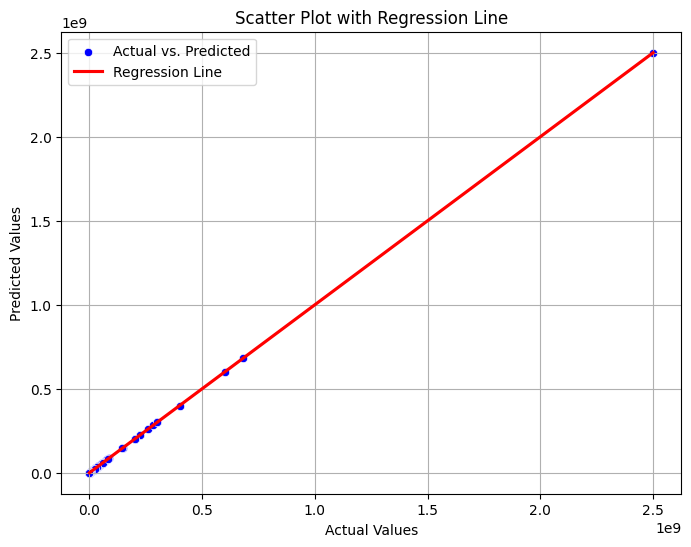

In [25]:
# Sample data
actual_values = y_test
predicted_values = y_pred

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=actual_values, y=predicted_values, color='blue', label='Actual vs. Predicted')

# Overlay regression line (line of best fit)
sns.regplot(x=actual_values, y=predicted_values, scatter=False, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot with Regression Line')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

**The diagonal line (y = x) represents perfect predictions. Points that fall exactly on this line indicate that the predicted values are equal to the actual values. In other words, the regression model perfectly predicts the target variable for these data points.**